In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from datetime import datetime
import matplotlib.gridspec as gridspec
from src.ProbBidClearing import ProbBidClearing

In [2]:
## Initialize ProbBidClearing Object

clearer = ProbBidClearing()

### Attitude Based Bidding

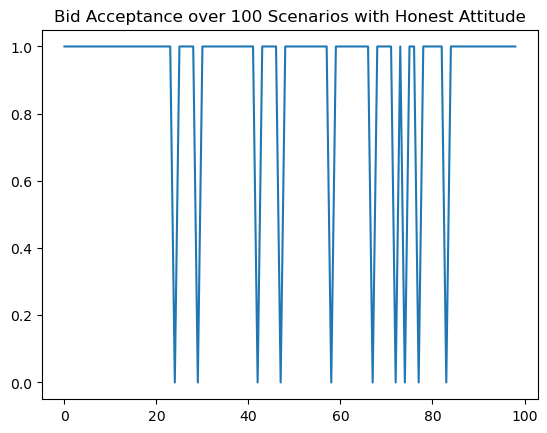

In [4]:
## Test if the discharge bid was accepted

# Sample bidding environment
RTP = 30.02044
bid = 36.13978
SOC = 0.5
attitude = "honest"

accept = []
n = 100

# Test norm prob clear over n scenarios
for i in range(1,n):
    accept.append(clearer.norm_prob_clear(RTP, bid, attitude, SOC))

## Show bid acceptance over scenarios
plt.plot(accept)
plt.title("Bid Acceptance over " + str(n) + " Scenarios with " + attitude.capitalize() + " Attitude")
plt.show()

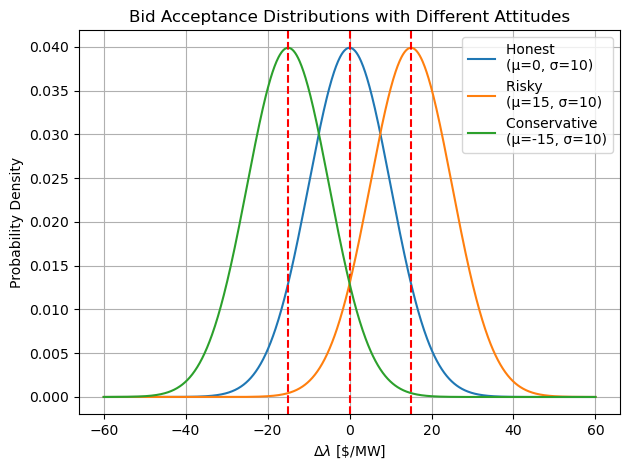

In [5]:
clearer.visualize_norm_attitudes()

### Custom Bidding

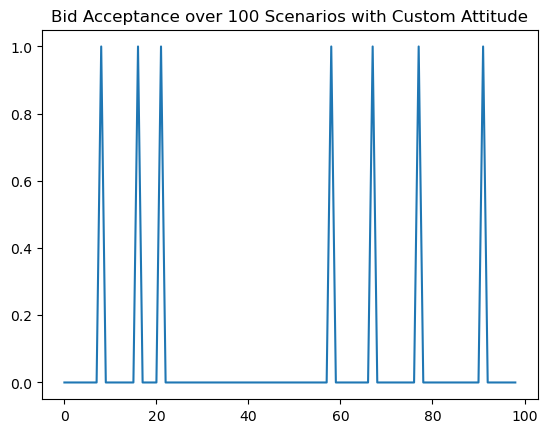

In [7]:
## Test if custom the discharge bid was accepted
bid = 40
mean = 0
std = 5

accept = []
n = 100

for i in range(1,n):
    accept.append(clearer.custom_norm_prob_clear(RTP, bid, SOC, mean, std))

## Show bid acceptance over scenarios
plt.plot(accept)
plt.title("Bid Acceptance over " + str(n) + " Scenarios with Custom Attitude")
plt.show()

### Time-Varying Bidding

#### Visualization

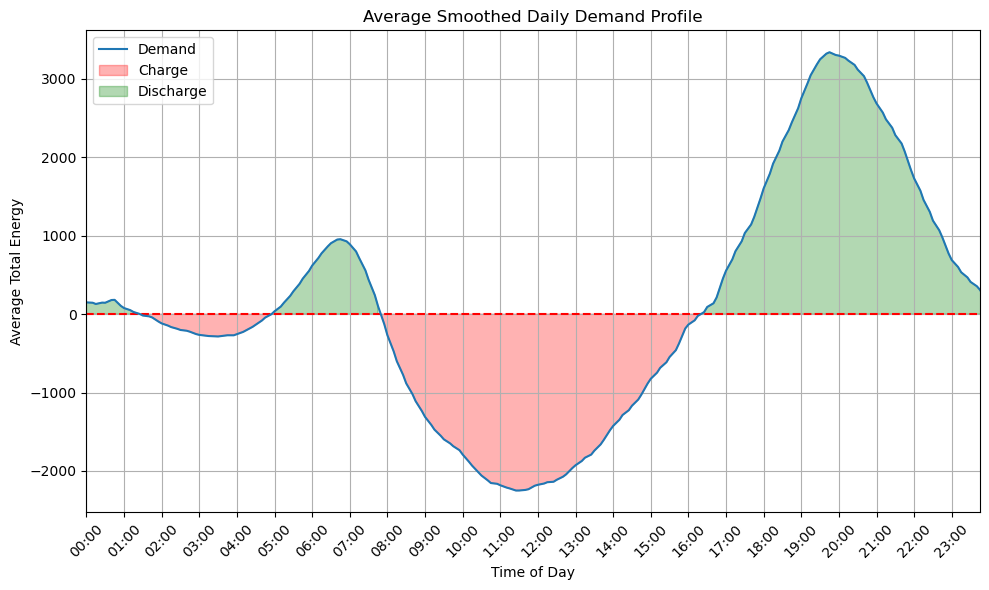

In [10]:
clearer.visualize_avg_demand_profile()

#### Bidding Environment

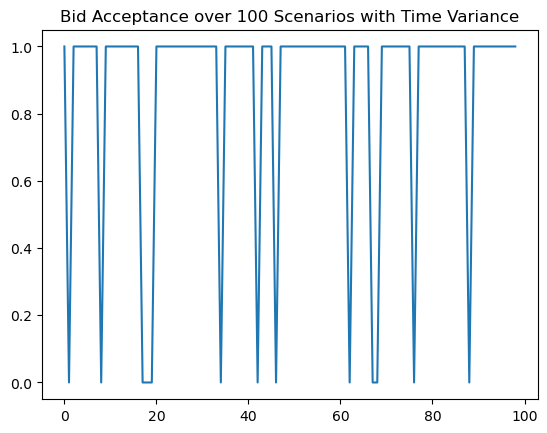

In [12]:
# Sample bidding environment
RTP = 50.02044
bid = 55.13978
SOC = 0.5
attitude = "honest"
date_string = '2024-10-01 6:45:00' # discharge time 
ts = datetime.strptime(date_string, "%Y-%m-%d %H:%M:%S")

accept = []
n = 100

for i in range(1,n):
    accept.append(clearer.timevarying_norm_prob_clear(RTP, bid, attitude, SOC, ts))

## Show bid acceptance over scenarios
plt.plot(accept)
plt.title("Bid Acceptance over " + str(n) + " Scenarios with Time Variance")
plt.show()

### Mean-Shifting Bidding

In [14]:
## Philosophy 

# Honest bidder has no mean shifting (mean always centered around 0 = RTP)
# Conservative bidder has alpha < 0
    # inverts demand - when demand is low, they bid higher; 
    # when demand is high they bid low
# Risky bidder has alpha > 0 
    # explores demand/price peaks 

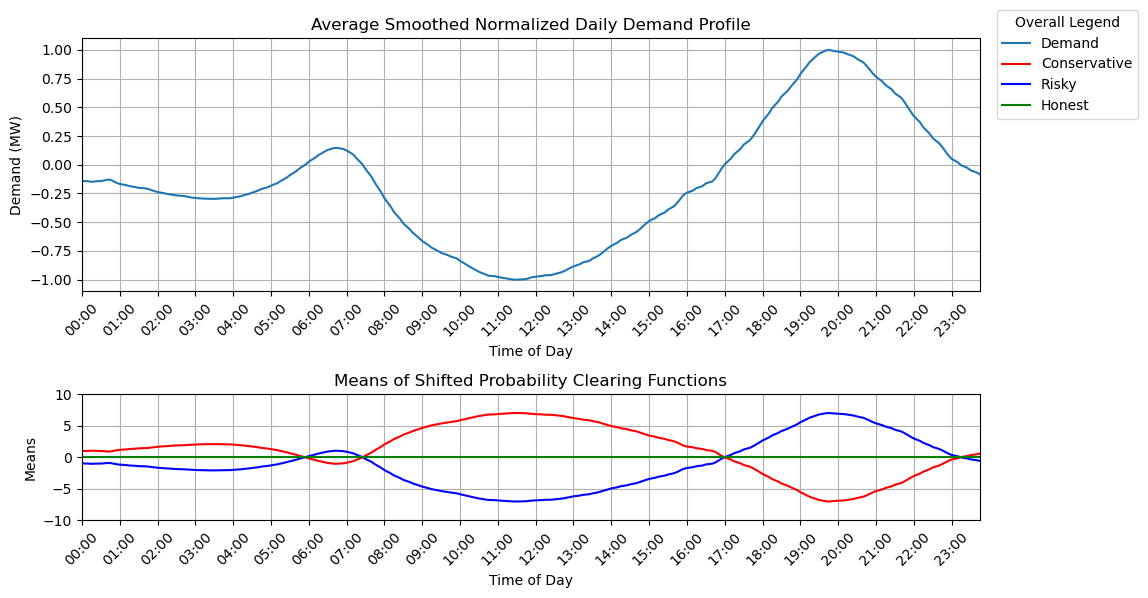

In [17]:
clearer.visualize_meanshift()